https://essentia.upf.edu/tutorial_rhythm_beatdetection.html

In [ ]:
!pip install essentia-tensorflow librosa

In [10]:
import essentia.standard as es
import librosa
from scipy.io.wavfile import write
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/johnsolk/audio_signal_processing

In [ ]:
!ls -lah audio_signal_processing/inputs/

# Load an audio file

In [2]:
#audio, sample_rate = librosa.load("inputs/frogs_owl_geese_backyard_Davis.mp3")
audio, sample_rate = librosa.load("audio_signal_processing/inputs/frogs_owl_geese_backyard_Davis.mp3")
sample_rate

22050

# Estimate beats

In [3]:
rhythm_extractor = es.RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

In [4]:
type(audio)

numpy.ndarray

In [5]:
print("BPM:", bpm)

BPM: 110.67533874511719


In [6]:
print("Beat positions (sec.):", beats)

Beat positions (sec.): [ 0.4643991  0.9287982  1.4396372  1.9040363  2.3800454  2.8792744
  3.3901134  3.9009523  4.365351   4.8297505  5.3173695  5.781769
  6.292608   6.8266664  7.3607254  7.9180045  8.452064   9.009342
  9.589841  10.1471195 10.727619  11.308118  11.842176  12.376236
 12.910295  13.409524  13.908752  14.373152  14.88399   15.38322
 15.859229  16.346848  16.834467  17.368526  17.925804  18.483084
 19.051973  19.644081  20.2478    20.781858  21.315918 ]


In [7]:
print("Beat estimation confidence:", beats_confidence)

Beat estimation confidence: 0.7870537042617798


# Insert beats

In [8]:
marker = es.AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audio)

In [9]:
type(marked_audio)

numpy.ndarray

In [12]:
rate = 44100
write('beats.wav',rate,marked_audio)

# Play the beats

In [13]:
import IPython
IPython.display.Audio('beats.wav')

# Visualize the beats

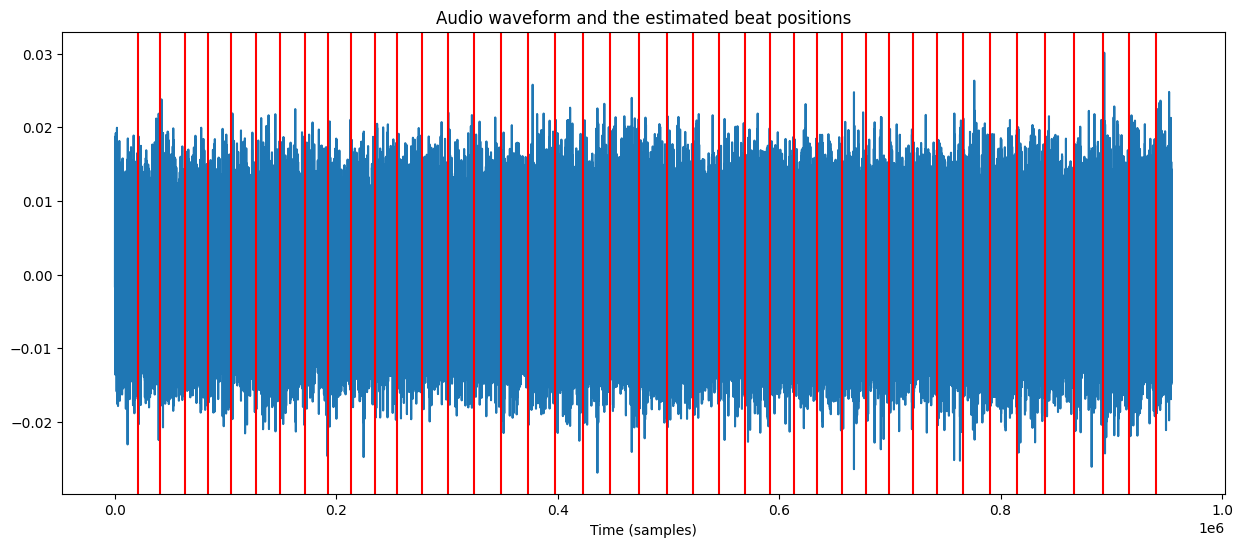

In [11]:
plt.rcParams['figure.figsize'] = (15, 6)
plot(audio)
for beat in beats:
    plt.axvline(x=beat*44100, color='red')
plt.xlabel('Time (samples)')
plt.title("Audio waveform and the estimated beat positions")
show()